In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
train = pd.read_csv('./train.csv', index_col= 0)
kaggle = pd.read_csv('./test.csv', index_col= 0)

In [136]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Columns: 121 entries, year to hf_score
dtypes: float64(117), int64(1), object(3)
memory usage: 984.6+ KB


In [137]:
train.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score
0,2013,GRC,Greece,Eastern Europe,6.700000,6.100000,4.600000,5.793651,9.459426,10.0,...,6.000000,9.560675,4.368423,8.895988,7.836600,6.511455,6.615249,6.88,82.0,7.486946
1,2012,COG,"Congo, Rep. Of",Sub-Saharan Africa,NaN,NaN,NaN,3.554800,6.053027,10.0,...,0.000000,5.961685,NaN,6.703546,3.251985,3.979304,5.521279,4.39,152.0,5.334761
2,2009,FJI,Fiji,Oceania,NaN,NaN,NaN,4.343008,8.638445,10.0,...,NaN,8.277233,NaN,8.631834,8.172880,8.360649,8.979383,7.08,59.0,7.318471
3,2009,IRL,Ireland,Western Europe,NaN,NaN,NaN,7.893729,9.509639,10.0,...,3.952381,9.579583,8.260776,7.683106,9.148091,7.010010,7.858009,7.76,12.0,8.402759
4,2011,ARE,United Arab Emirates,Middle East & North Africa,6.066667,6.037091,7.486491,6.500000,9.764773,10.0,...,8.787879,9.680841,8.618148,9.983350,9.865488,8.884073,8.576617,7.69,17.0,6.264678


In [138]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Columns: 120 entries, year to ef_rank
dtypes: float64(116), int64(1), object(3)
memory usage: 326.1+ KB


In [139]:
kaggle.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2010,MDG,Madagascar,Sub-Saharan Africa,4.300000,5.349745,4.949092,4.900000,6.329103,5.0,...,3.209803,4.090909,9.616764,3.035905,7.349900,7.746925,5.841701,6.258045,6.41,104.0
1,2012,BEL,Belgium,Western Europe,8.500000,6.900000,6.700000,7.360317,9.260165,10.0,...,2.748521,8.666667,9.757642,7.306827,7.330529,8.206508,7.336116,8.090983,7.35,42.0
2,2013,MMR,Myanmar,South Asia,2.100000,3.900000,3.200000,3.087302,9.037478,5.0,...,3.176697,1.333333,2.723830,2.163515,8.815891,8.268159,4.413571,5.563482,5.35,146.0
3,2016,CHL,Chile,Latin America & the Caribbean,7.706122,6.291439,5.550751,6.516104,8.614887,10.0,...,4.039881,7.777778,9.792396,5.964517,8.747894,6.738086,7.176759,7.098290,7.80,15.0
4,2015,MLT,Malta,Western Europe,NaN,NaN,NaN,7.086754,9.625833,10.0,...,4.101592,4.888889,9.034103,4.659129,8.191041,8.441904,6.552776,8.097235,7.72,18.0


In [140]:
len(train)

1033

In [141]:
train.isna().sum().argmax()

/Users/richardmason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


'pf_identity_legal'

In [142]:
train['pf_identity_legal'].isna().sum()

879

In [143]:
na = train.isna().sum()

In [144]:
na[na > 0]

pf_rol_procedural                     375
pf_rol_civil                          375
pf_rol_criminal                       375
pf_ss_disappearances_disap              6
pf_ss_disappearances_organized         81
pf_ss_women_fgm                        71
pf_ss_women_missing                    33
pf_ss_women_inheritance_widows        348
pf_ss_women_inheritance_daughters     348
pf_ss_women_inheritance                35
pf_ss_women                            17
pf_movement_domestic                   12
pf_movement_foreign                    12
pf_movement_women                      50
pf_religion_estop_establish           481
pf_religion_estop_operate             481
pf_religion_estop                     183
pf_religion_harassment                 10
pf_religion_restrictions               10
pf_religion                             6
pf_association_association            183
pf_association_assembly               183
pf_association_political_establish    481
pf_association_political_operate  

In [145]:
na[na > 500]

pf_identity_legal      879
pf_identity_divorce    606
dtype: int64

In [146]:
# Doing some EDA
corr = train.corr()[['hf_score']].sort_values('hf_score', ascending = False)

In [147]:
top_corr = corr[abs(corr.hf_score) > 0.6]

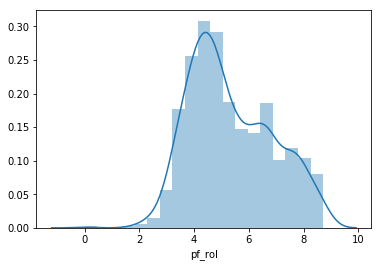

In [148]:
sns.distplot(train['pf_rol'])

In [56]:
# Combining train and 'kaggle'
All = pd.concat([train, kaggle])

/Users/richardmason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [57]:
All.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 344
Data columns (total 121 columns):
ISO_code                              object
countries                             object
ef_government                         float64
ef_government_consumption             float64
ef_government_enterprises             float64
ef_government_tax                     float64
ef_government_tax_income              float64
ef_government_tax_payroll             float64
ef_government_transfers               float64
ef_legal                              float64
ef_legal_courts                       float64
ef_legal_crime                        float64
ef_legal_enforcement                  float64
ef_legal_gender                       float64
ef_legal_integrity                    float64
ef_legal_judicial                     float64
ef_legal_military                     float64
ef_legal_police                       float64
ef_legal_protection                   float64
ef_legal_restrictions

In [58]:
# How should we fill NA's?


In [59]:
All['countries']

0                    Greece
1            Congo, Rep. Of
2                      Fiji
3                   Ireland
4      United Arab Emirates
5                     Malta
6               New Zealand
7                  Barbados
8                      Oman
9                   Armenia
10          Pap. New Guinea
11                    Haiti
12                 Cameroon
13                  Jamaica
14                   France
15                  Ecuador
16                   Turkey
17                  Bahamas
18                 Zimbabwe
19                  Belgium
20              Slovak Rep.
21                    Benin
22                   Panama
23              New Zealand
24                 Pakistan
25               Azerbaijan
26                    Qatar
27                   Cyprus
28                Guatemala
29                 Cameroon
               ...         
315                Tanzania
316                 Estonia
317                  Russia
318                Cameroon
319                 

In [60]:
All['ISO_code']

0      GRC
1      COG
2      FJI
3      IRL
4      ARE
5      MLT
6      NZL
7      BRD
8      OMN
9      ARM
10     PNG
11     HTI
12     CMR
13     JAM
14     FRA
15     ECU
16     TUR
17     BHS
18     ZWE
19     BEL
20     SVK
21     BEN
22     PAN
23     NZL
24     PAK
25     AZE
26     QAT
27     CYP
28     GTM
29     CMR
      ... 
315    TZA
316    EST
317    RUS
318    CMR
319    BLZ
320    VNM
321    GBR
322    GUY
323    ZWE
324    COD
325    UKR
326    YEM
327    IRL
328    TLS
329    BGD
330    SLE
331    MLI
332    MYS
333    TGO
334    MDA
335    SRB
336    ARG
337    HUN
338    KWT
339    HKG
340    OMN
341    PAN
342    EGY
343    KGZ
344    AZE
Name: ISO_code, Length: 1378, dtype: object

In [65]:
All['region'].unique()

array(['Eastern Europe', 'Sub-Saharan Africa', 'Oceania',
       'Western Europe', 'Middle East & North Africa',
       'Latin America & the Caribbean', 'Caucasus & Central Asia',
       'South Asia', 'East Asia', 'North America'], dtype=object)

In [64]:
All['year'].unique()

array([2013, 2012, 2009, 2011, 2008, 2014, 2010, 2016, 2015])

In [75]:
# Dropping clearly useless columns
All.drop(columns = ['ISO_code', 'countries'], axis = 1, inplace = True)

In [76]:
All['year'] = All['year'].astype('str')

In [80]:
# Converting some columns to categories
All = pd.get_dummies(All)

In [93]:
# We'll just do this for now ;:
All.fillna(-999, inplace = True)

In [94]:
# separating the data back out
train = All[:1033]
kaggle = All[1033:]

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Columns: 136 entries, ef_government to year_2016
dtypes: float64(117), uint8(19)
memory usage: 971.5 KB


In [97]:
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 344
Columns: 136 entries, ef_government to year_2016
dtypes: float64(117), uint8(19)
memory usage: 324.4 KB


In [117]:
kaggle['hf_score']

0     -999.0
1     -999.0
2     -999.0
3     -999.0
4     -999.0
5     -999.0
6     -999.0
7     -999.0
8     -999.0
9     -999.0
10    -999.0
11    -999.0
12    -999.0
13    -999.0
14    -999.0
15    -999.0
16    -999.0
17    -999.0
18    -999.0
19    -999.0
20    -999.0
21    -999.0
22    -999.0
23    -999.0
24    -999.0
25    -999.0
26    -999.0
27    -999.0
28    -999.0
29    -999.0
       ...  
315   -999.0
316   -999.0
317   -999.0
318   -999.0
319   -999.0
320   -999.0
321   -999.0
322   -999.0
323   -999.0
324   -999.0
325   -999.0
326   -999.0
327   -999.0
328   -999.0
329   -999.0
330   -999.0
331   -999.0
332   -999.0
333   -999.0
334   -999.0
335   -999.0
336   -999.0
337   -999.0
338   -999.0
339   -999.0
340   -999.0
341   -999.0
342   -999.0
343   -999.0
344   -999.0
Name: hf_score, Length: 345, dtype: float64

In [100]:
y = train['hf_score']
X = train.drop(columns = 'hf_score', axis = 1)

In [101]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [106]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
ridge = Ridge()
elastic = ElasticNet()
lasso = Lasso()

In [107]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [108]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scale', min_max),
                ('ridge', ridge)])

param_grid = {'scale__feature_range': [(0,1), (-1,1)],
             'ridge__alpha': np.logspace(-3, 2, 5)}

In [109]:
gridsearch = GridSearchCV(pipe, param_grid)

In [110]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(0, 1))), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scale__feature_range': [(0, 1), (-1, 1)], 'ridge__alpha': array([1.00000e-03, 1.77828e-02, 3.16228e-01, 5.62341e+00, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [111]:
gridsearch.best_estimator_

Pipeline(memory=None,
     steps=[('scale', MinMaxScaler(copy=True, feature_range=(-1, 1))), ('ridge', Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [112]:
gridsearch.best_score_

0.999755287289298

In [113]:
gridsearch.score(X_test, y_test)

0.9999999721576841

In [115]:
kaggle.shape

(345, 136)

In [116]:
train.shape

(1033, 136)

In [118]:
kaggle.drop(columns = 'hf_score', axis = 1, inplace= True)

/Users/richardmason/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1]:
preds = ridge.predict(kaggle)

preds = pd.DataFrame(preds, columns = ['hf_score'])

preds = pd.DataFrame({'Id':preds.index,
                     'hf_score':preds.hf_score})

prediction_1 = preds.to_csv('./Prediction_1.csv', index=False)

NameError: name 'gridsearch' is not defined